In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, confusion_matrix


# for dataset generator
from keras.utils import image_dataset_from_directory,Sequence

# for data augmentation
from keras.preprocessing.image import ImageDataGenerator  


# for save model and to bring model 
from keras.models import load_model

# 
from keras.applications import VGG16, VGG19


import keras_tuner as k
from keras.layers import Dense, Dropout, BatchNormalization, Input    # creates fully connected layers
from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix
from keras.regularizers import L1,L2,L1L2
from keras.initializers import Zeros,ones,GlorotNormal,GlorotUniform,HeNormal,HeUniform,RandomNormal,RandomUniform
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard,CSVLogger

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=ImageDataGenerator(rotation_range=90,horizontal_flip=True,
                  vertical_flip=True,rescale=1./255.) 
test=ImageDataGenerator(rescale=1./255.) 
validation=ImageDataGenerator(rescale=1./255.)

In [3]:
training=train.flow_from_directory('/kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/train',target_size=(256,256),class_mode='sparse',batch_size=32) 

Found 2177 images belonging to 2 classes.


In [4]:
testg=test.flow_from_directory('/kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/test',target_size=(256,256),class_mode='sparse',batch_size=32) 

Found 648 images belonging to 2 classes.


In [5]:
validg=validation.flow_from_directory('/kaggle/input/plastic-bottles-image-dataset/Plastic Bottle Image Dataset/valid',target_size=(256,256),class_mode='sparse',batch_size=32)

Found 1174 images belonging to 2 classes.


In [6]:
# model =Sequential()
# model.add(Input(shape = (256,256,3)))
# model.add(Conv2D(50,(5,5),strides = (1,1),padding = "valid", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

# model.add(Conv2D(30,(5,5),strides = (1,1),padding = "valid", activation = "relu"))
# model.add(MaxPooling2D(pool_size =(2,2), strides = (2,2)))

# model.add(Flatten())
# model.add(Dense(100,activation = "relu"))
# # model.add(Dropout(0.2))
# model.add(BatchNormalization()) 
# model.add(Dense(50,activation = "relu")) 
# model.add(Dense(1,activation = "sigmoid")) 

model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0

In [8]:
 mc = ModelCheckpoint(r"model_checkoint\model{epoch}.h5",monitor="val_loss",verbose=1,save_best_only=True,)

In [9]:
es = EarlyStopping(monitor = 'val_loss',min_delta=0.1,patience=3,verbose=1,start_from_epoch=3)

In [10]:
csv = CSVLogger(r"log.csv")

In [11]:
tb = TensorBoard(log_dir = r"tensorboard\logdir", histogram_freq = 1)

In [12]:
# Loading tensorboard port
%load_ext tensorboard
%tensorboard --logdir r"tensorboard\logdir" 

In [13]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) 

In [14]:
history=model.fit(training,steps_per_epoch=718//32, epochs=20, validation_data=validg,
                  validation_steps=208//32,callbacks=[es,tb,mc,csv]) 

Epoch 1/20
22/22 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9986
Epoch 1: val_loss improved from inf to 0.00000, saving model to model_checkoint\model1.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 60s 2s/step - loss: 0.0295 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
22/22 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.00000
22/22 [==============================] - 45s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
22/22 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.00000
22/22 [==============================] - 42s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
22/22 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.00000
22/22 [==============================] - 43s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
22/22 [===

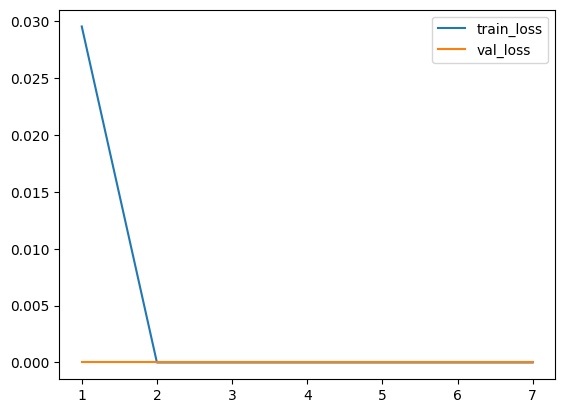

In [15]:
import matplotlib.pyplot as plt 
plt.plot(range(1,8),history.history["loss"],label="train_loss")
plt.plot(range(1,8),history.history["val_loss"],label="val_loss")
plt.legend()  

In [16]:
predic = model.predict(testg) 

21/21 [==============================] - 44s 2s/step


In [17]:
predicted=np.where(predic>0.5,1,0)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

In [19]:
print('accuracy:',accuracy_score(testg.labels,predicted))  

accuracy: 1.0
